In [1]:
import pandas as pd
import numpy as np
import os
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sn
from wordcloud import WordCloud,ImageColorGenerator

In [2]:
# Loading the data 
import os
os.chdir('C:/Users/cui62/Desktop/CSUEB/BAN 693/data')

# Loading Aisles data into Aisles
aisles = pd.read_csv('aisles.csv')

# Loading Departments data into Departments
departments = pd.read_csv('departments.csv')

# Loading Training order data into orderProductsTrain
orderProductsTrain = pd.read_csv('order_products__train.csv')

# Loading the Orders into Orders
orders = pd.read_csv('orders.csv')

# Loading Products data into Products
products = pd.read_csv('products.csv')

# Loading Prior order data into orderProductsPrior
orderProductsPrior = pd.read_csv('order_products__prior.csv')

In [3]:
#checking if dfs have nulls one by one
aisles.isnull().sum()
departments.isnull().sum()
products.isnull().sum()
orderProductsPrior.isnull().sum()
orderProductsTrain
orders.isnull().sum() # orders dataset has some nulls. We will drop them.

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [4]:
orders.isnull().sum() 

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [5]:
orderProductsPrior.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [4]:
orders.dropna(inplace=True)

In [15]:
orders.head(15)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [16]:
orders.info

<bound method DataFrame.info of          order_id  user_id eval_set  order_number  order_dow  \
0         2539329        1    prior             1          2   
1         2398795        1    prior             2          3   
2          473747        1    prior             3          3   
3         2254736        1    prior             4          4   
4          431534        1    prior             5          4   
...           ...      ...      ...           ...        ...   
3421078   2266710   206209    prior            10          5   
3421079   1854736   206209    prior            11          4   
3421080    626363   206209    prior            12          1   
3421081   2977660   206209    prior            13          1   
3421082    272231   206209    train            14          6   

         order_hour_of_day  days_since_prior_order  
0                        8                     NaN  
1                        7                    15.0  
2                       12              

In [17]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [19]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [7]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [20]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [10]:
departments["department"].value_counts()

frozen             1
meat seafood       1
deli               1
snacks             1
babies             1
household          1
dairy eggs         1
canned goods       1
breakfast          1
pantry             1
personal care      1
other              1
bulk               1
dry goods pasta    1
pets               1
beverages          1
international      1
alcohol            1
produce            1
bakery             1
missing            1
Name: department, dtype: int64

In [22]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [24]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [25]:
orderProductsTrain.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [26]:
orderProductsPrior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


# Data Exploration

**1. Product Analysis**

,product_id,count,product_name,aisle_id,department_id
0,24852,18726,Banana,24,4
1,13176,15480,Bag of Organic Bananas,24,4
2,21137,10894,Organic Strawberries,24,4
3,21903,9784,Organic Baby Spinach,123,4
4,47626,8135,Large Lemon,24,4
5,47766,7409,Organic Avocado,24,4
6,47209,7293,Organic Hass Avocado,24,4
7,16797,6494,Strawberries,24,4
8,26209,6033,Limes,24,4
9,27966,5546,Organic Raspberries,123,4


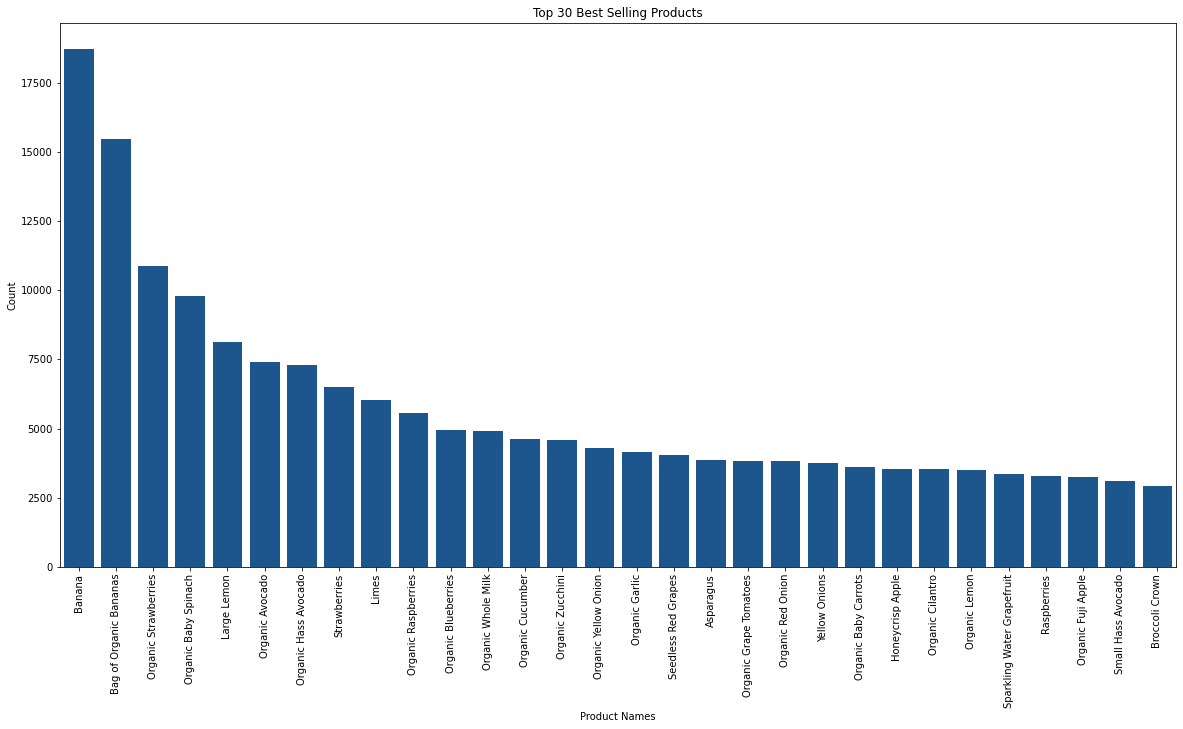

In [7]:
# What are the best selling products?
productsCount = orderProductsTrain["product_id"].value_counts().to_frame()
productsCount["count"] = productsCount.product_id
productsCount["product_id"] = productsCount.index
mergedData = pd.merge(productsCount,products,how="left",on="product_id").sort_values(by="count",ascending=False)

#top 30 the best selling products
fig,ax = plt.subplots()
fig.set_size_inches(20,10)
sn.barplot(data=mergedData.head(30),x="product_name",y="count",ax=ax,orient="v",color="#0b559f")
ax.set(xlabel='Product Names',ylabel="Count",title="Top 30 Best Selling Products")
plt.xticks(rotation=90)

mergedData.head(20)

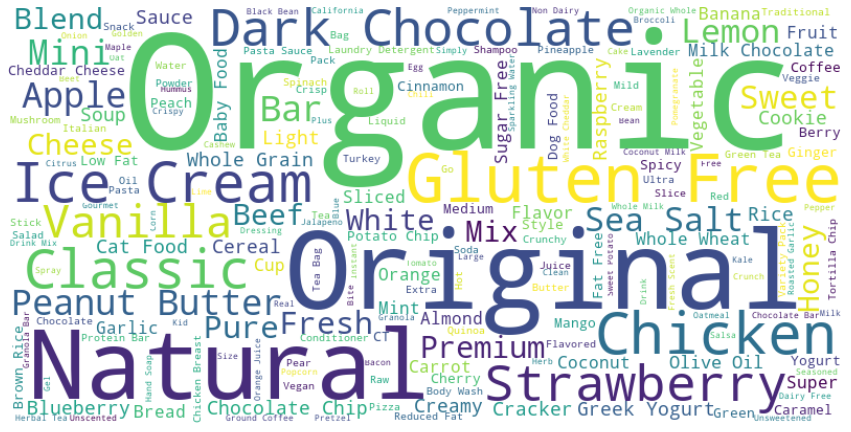

In [29]:
# Frequent words that describe the products
text = ' '.join(mergedData['product_name'])
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text)
plt.figure(figsize = (15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [30]:
# Merging products, department and aisle df together.
products_departments = products.merge(departments, left_on='department_id', right_on='department_id', how='left')
products_departments_aisles = products_departments.merge(aisles, left_on='aisle_id', right_on='aisle_id', how='left')
products_departments_aisles.head()

,product_id,product_name,aisle_id,department_id,department,aisle
0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes
1,2,All-Seasons Salt,104,13,pantry,spices seasonings
2,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages,tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen,frozen meals
4,5,Green Chile Anytime Sauce,5,13,pantry,marinades meat preparation


In [18]:
# Merging products_departments_aisles and order_products_total df.
order_products_total = pd.concat([orderProductsPrior, orderProductsTrain]) 
df = order_products_total.merge(products_departments_aisles, left_on='product_id', right_on='product_id', how='left')
df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,dairy eggs,eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,produce,fresh vegetables
2,2,9327,3,0,Garlic Powder,104,13,pantry,spices seasonings
3,2,45918,4,1,Coconut Butter,19,13,pantry,oils vinegars
4,2,30035,5,0,Natural Sweetener,17,13,pantry,baking ingredients


In [31]:
# How many items is in each product category?
products_departments_aisles.groupby('department')['product_id'].count().reset_index().sort_values(by='product_id', ascending=False).head(50)

,department,product_id
17,personal care,6563
20,snacks,6264
16,pantry,5371
3,beverages,4365
10,frozen,4007
7,dairy eggs,3449
11,household,3085
6,canned goods,2092
9,dry goods pasta,1858
19,produce,1684


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text major ticklabel objects>)

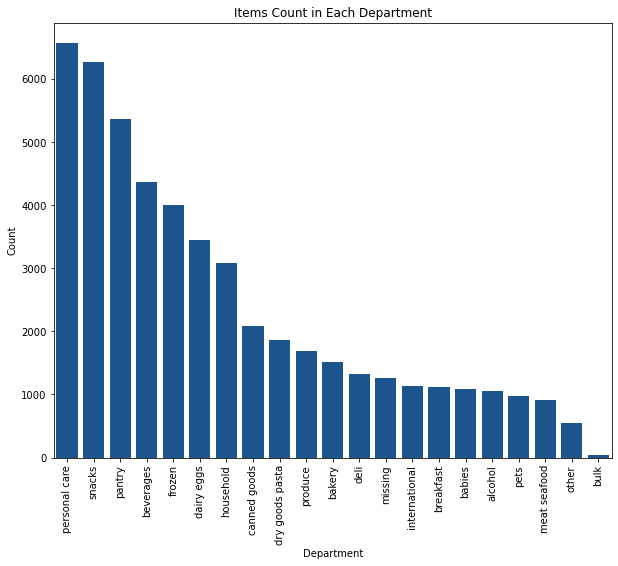

In [26]:
df_products_departments_aisles=products_departments_aisles.groupby('department')['product_id'].count().reset_index().sort_values(by='product_id', ascending=False).head(50)
fig,ax = plt.subplots()
fig.set_size_inches(10,8)
sn.barplot(data=df_products_departments_aisles,x="department",y="product_id",ax=ax,orient="v", color='#0b559f')
ax.set(xlabel='Department',ylabel="Count",title="Items Count in Each Department")
plt.xticks(rotation=90)

,aisle_name,count
0,fresh fruits,3792661
1,fresh vegetables,3568630
2,packaged vegetables fruits,1843806
3,yogurt,1507583
4,packaged cheese,1021462
5,milk,923659
6,water seltzer sparkling water,878150
7,chips pretzels,753739
8,soy lactosefree,664493
9,bread,608469


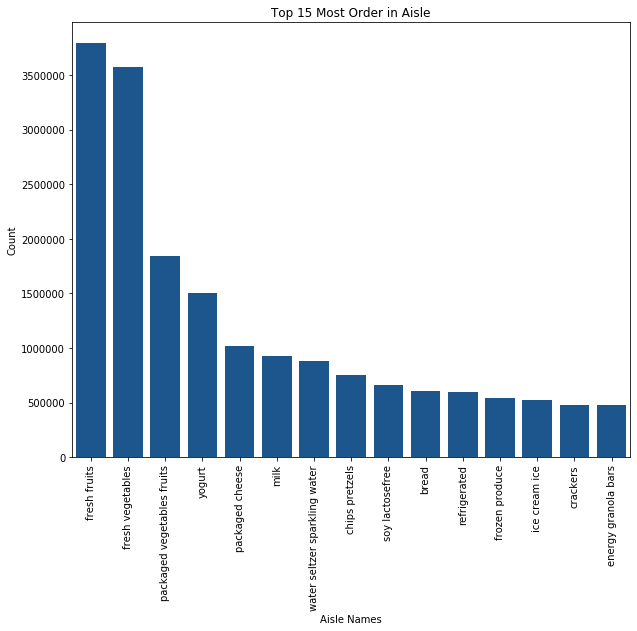

In [16]:
# What's the most ordering in Aisle?
top_15_aisles = df.aisle.value_counts(ascending=False).reset_index().head(15)
top_15_aisles.columns = ['aisle_name', 'count']

fig,ax = plt.subplots()
fig.set_size_inches(10,8)
sn.barplot(data=top_15_aisles,x="aisle_name",y="count",ax=ax,orient="v", color='#0b559f')
ax.set(xlabel='Aisle Names',ylabel="Count",title="Top 15 Most Order in Aisle")
plt.xticks(rotation=90)

top_15_aisles

,department_name,count
0,produce,9888378
1,dairy eggs,5631067
2,snacks,3006412
3,beverages,2804175
4,frozen,2336858
5,pantry,1956819
6,bakery,1225181
7,canned goods,1114857
8,deli,1095540
9,dry goods pasta,905340


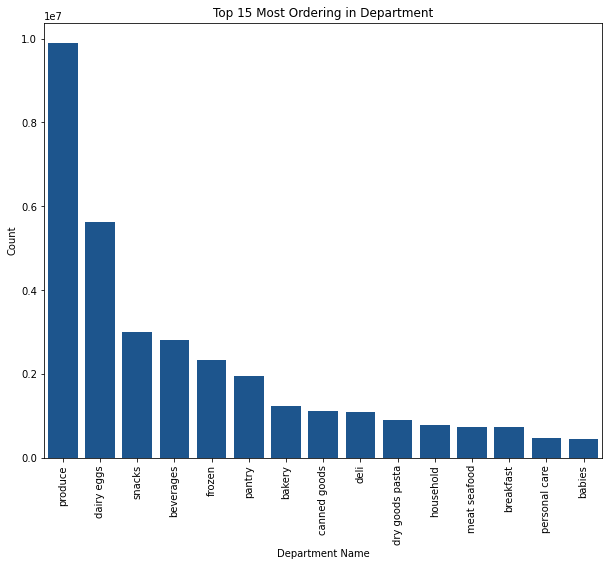

In [27]:
# What's the most ordering in Department?
top_15_department = df.department.value_counts(ascending=False).reset_index().head(15)
top_15_department.columns = ['department_name', 'count']


fig,ax = plt.subplots()
fig.set_size_inches(10,8)
sn.barplot(data=top_15_department,x="department_name",y="count",ax=ax,orient="v", color='#0b559f')
ax.set(xlabel='Department Name',ylabel="Count",title="Top 15 Most Ordering in Department")
plt.xticks(rotation=90)

top_15_department

**2. Reorder Analysis**

In [34]:
# merge order_prior, products, aisels, department df
prior_df = pd.merge(orderProductsPrior, products, on='product_id', how='left')
prior_df=pd.merge(prior_df, aisles, on='aisle_id', how='left')
prior_df = pd.merge(prior_df, departments, on='department_id', how='left')

# merge orders, order_prior df
prior_df = pd.merge(orders, prior_df, on='order_id', how='inner')
prior_df.head()


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,soft drinks,beverages
1,2539329,1,prior,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,soy lactosefree,dairy eggs
2,2539329,1,prior,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,popcorn jerky,snacks
3,2539329,1,prior,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,popcorn jerky,snacks
4,2539329,1,prior,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,paper goods,household


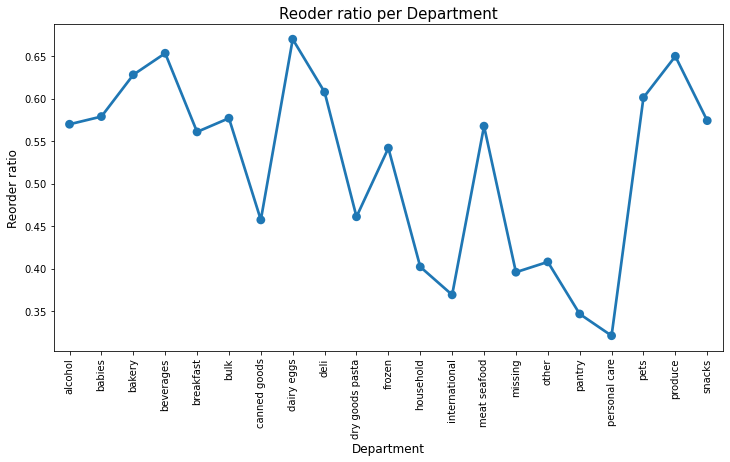

In [33]:
#What are the reorder ratio per department?

#group reorder by Deparment
reorder_by_dept = prior_df.groupby(["department"])["reordered"].aggregate("mean").reset_index()

#The reorder ratio per department
plt.figure(figsize=(12,6))
sn.pointplot(reorder_by_dept['department'].values, reorder_by_dept['reordered'].values, alpha=0.5)
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Reoder ratio per Department", fontsize=15)
plt.xticks(rotation=90)
plt.show()

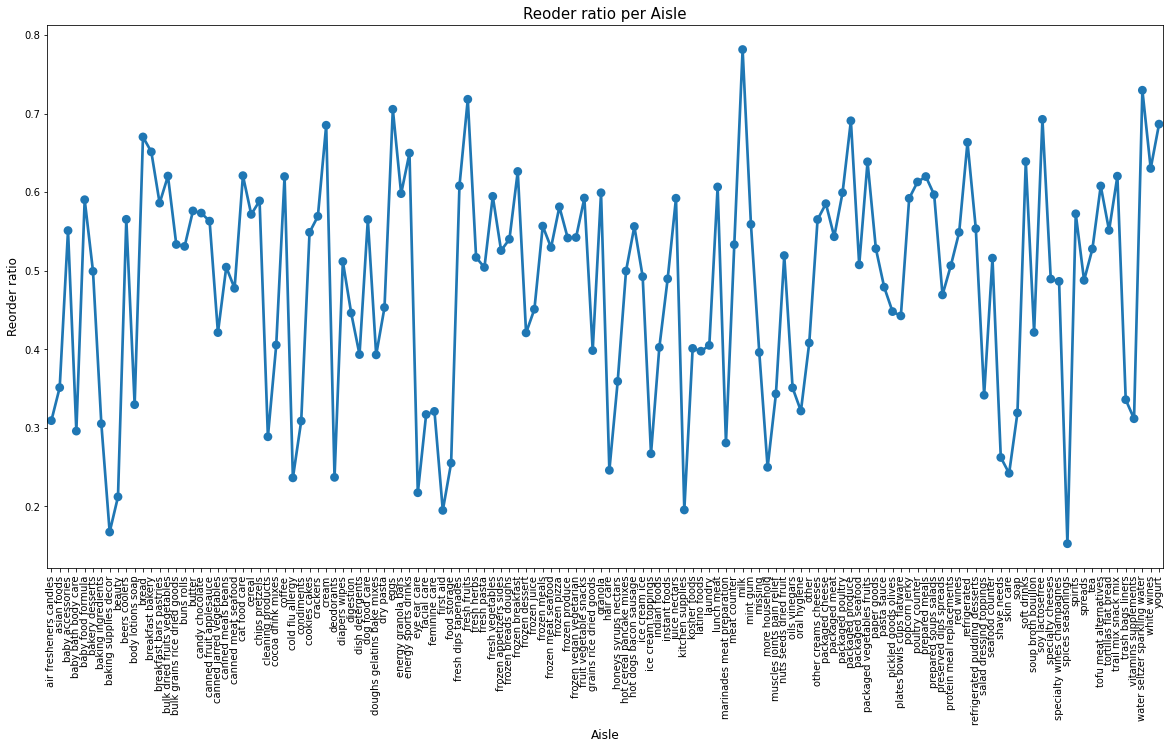

In [36]:
# What are the reorder ratio per aisle?

#group reorder by aisle
reorder_by_aisle = prior_df.groupby(["aisle"])["reordered"].aggregate("mean").reset_index()

#The the reorder ratio per aisle
plt.figure(figsize=(20,10))
sn.pointplot(reorder_by_aisle["aisle"].values, reorder_by_aisle['reordered'].values, alpha=0.5)
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.title("Reoder ratio per Aisle", fontsize=15)
plt.xticks(rotation=90)
plt.show()

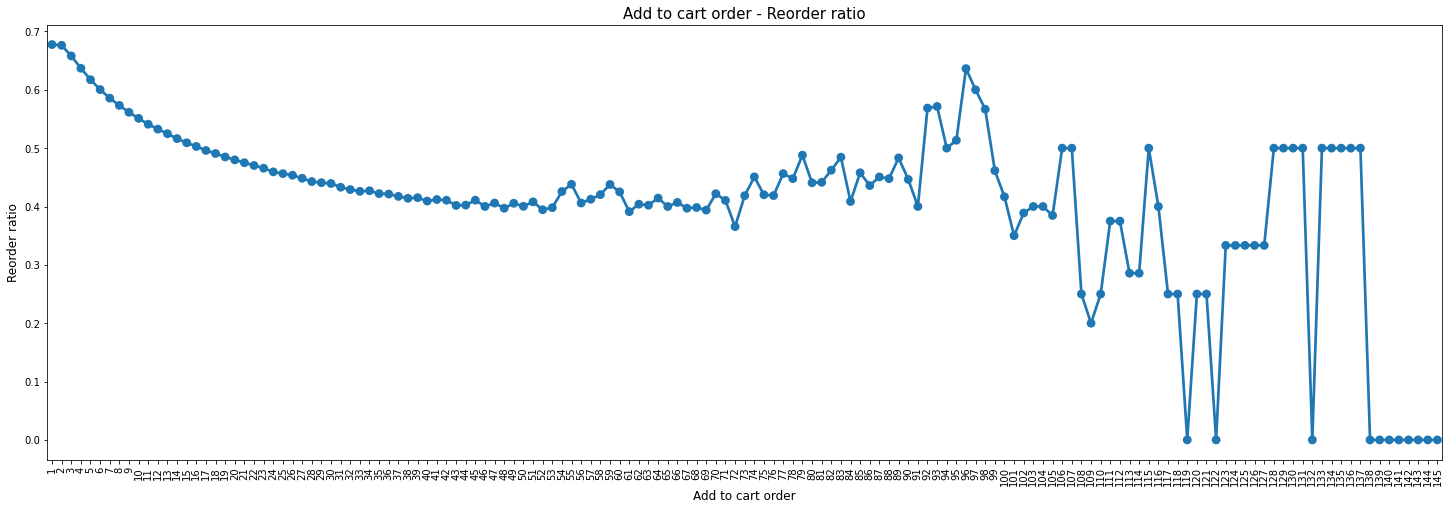

In [37]:
# What are the reorder ratio and add_to_cart?
reorder_by_addcart = prior_df.groupby(["add_to_cart_order"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(25,8))
sn.pointplot(reorder_by_addcart["add_to_cart_order"].values, reorder_by_addcart['reordered'].values, alpha=0.5)
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Add to cart order', fontsize=12)
plt.title("Add to cart order - Reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

**3. User Analysis**

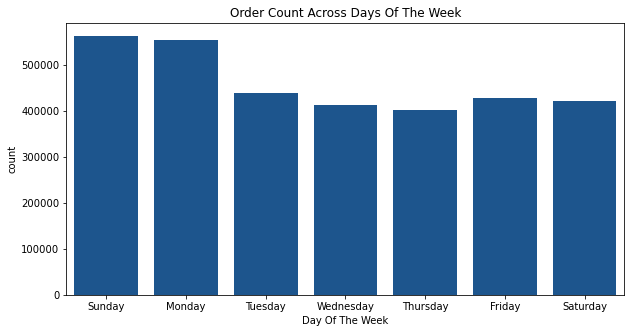

In [9]:
# What day of the week people place their order?
fig,ax = plt.subplots()
fig.set_size_inches(10,5)
ordersDay = orders[["order_dow"]].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"})

sn.countplot(color='#0b559f',data=ordersDay,x="order_dow",ax=ax,order=["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"])
ax.set(xlabel='Day Of The Week',title="Order Count Across Days Of The Week")
plt.show()

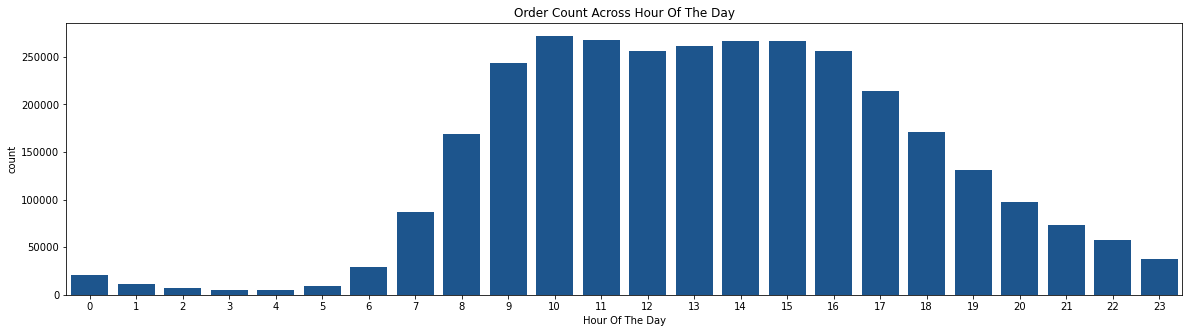

In [10]:
# What hours of the day people generally place their orders?
fig,ax = plt.subplots()
fig.set_size_inches(20,5)
sn.countplot(data=orders,x="order_hour_of_day",ax=ax,color='#0b559f')
ax.set(xlabel='Hour Of The Day',title="Order Count Across Hour Of The Day")
plt.show()

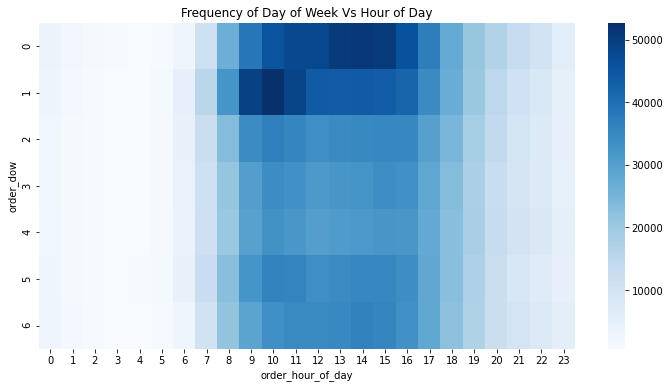

In [13]:
# How's the frequency of day of Week VS hour of Day?
grouped = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped = grouped.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(12,6))
sn.heatmap(grouped, cmap="Blues")
plt.title("Frequency of Day of Week Vs Hour of Day")
plt.show()

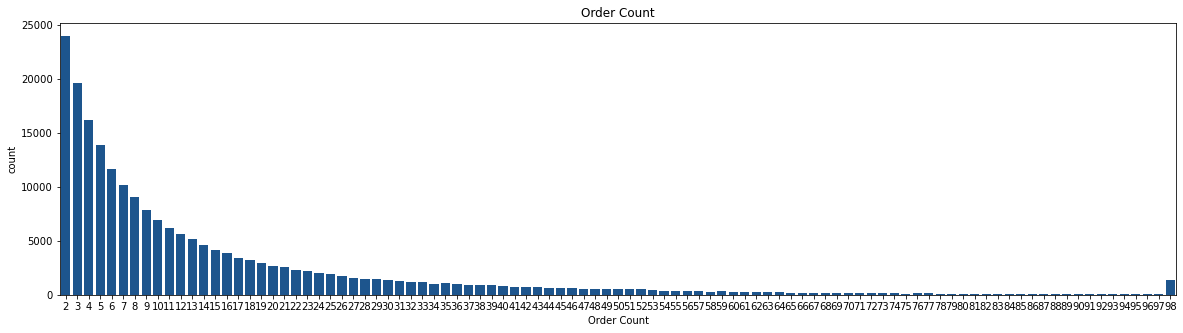

In [15]:
# How many order were generally made by a user?
orderCount = orders[orders["eval_set"]=="prior"].groupby(by=["user_id"])["order_id"].count().to_frame()
fig,ax = plt.subplots()
fig.set_size_inches(20,5)
sn.countplot(color='#0b559f',data=orderCount,x="order_id",ax=ax)
ax.set(xlabel='Order Count',title="Order Count")
plt.show()

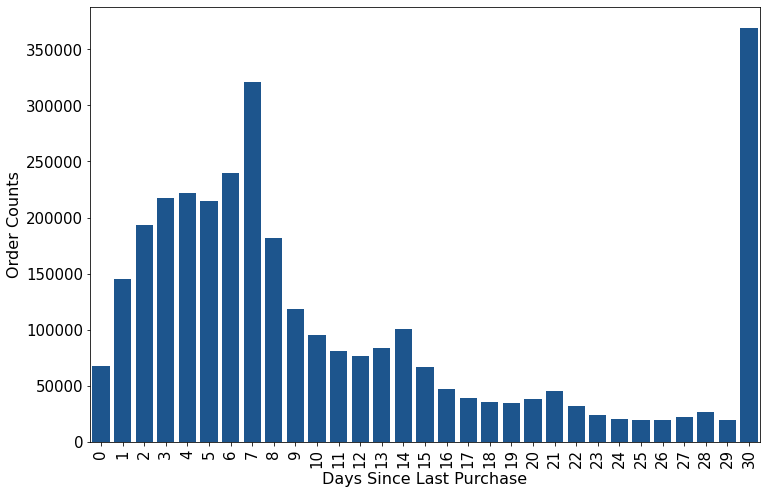

In [16]:
# How often do people purchase?
plt.figure(figsize=(12,8))
sn.countplot(x=orders.days_since_prior_order, color='#0b559f')

#plt.title("Number of Orders per Days Since Last Purchase", fontsize=16)
plt.xlabel('Days Since Last Purchase', fontsize=16)
plt.xticks(np.arange(31), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                          24, 25, 26, 27, 28, 29, 30],  fontsize=15)
plt.xticks(rotation='vertical')
plt.ylabel('Order Counts', fontsize=16)
plt.yticks(fontsize=15)
plt.show()